In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

**Classification**

In [ ]:
Classification_df = pd.read_csv('/content/drive/MyDrive/Portfolio Datasets/depression_data.csv')
Classification_df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


This dataset is sourced from Kaggle where it was uploaded by Anthony Therrien. it  contains information on individuals with various attributes related to their personal and lifestyle factors. It is designed to facilitate analysis in areas such as health, lifestyle, and socio-economic status. This dataset aligns with the goal of UNSDG 3 Good Health and well being as this data can be used to predict the causes and see the possible effects of depression on people from various age gorups and social economic status.

In [ ]:
Classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [ ]:
Classification_df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [ ]:
Classification_df.nunique()

,0
Name,196851
Age,63
Marital Status,4
Education Level,5
Number of Children,5
Smoking Status,3
Physical Activity Level,3
Employment Status,2
Income,405282
Alcohol Consumption,3


In [ ]:
Classification_df.isnull().sum()

,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [ ]:
Classification_df.duplicated().sum()

0

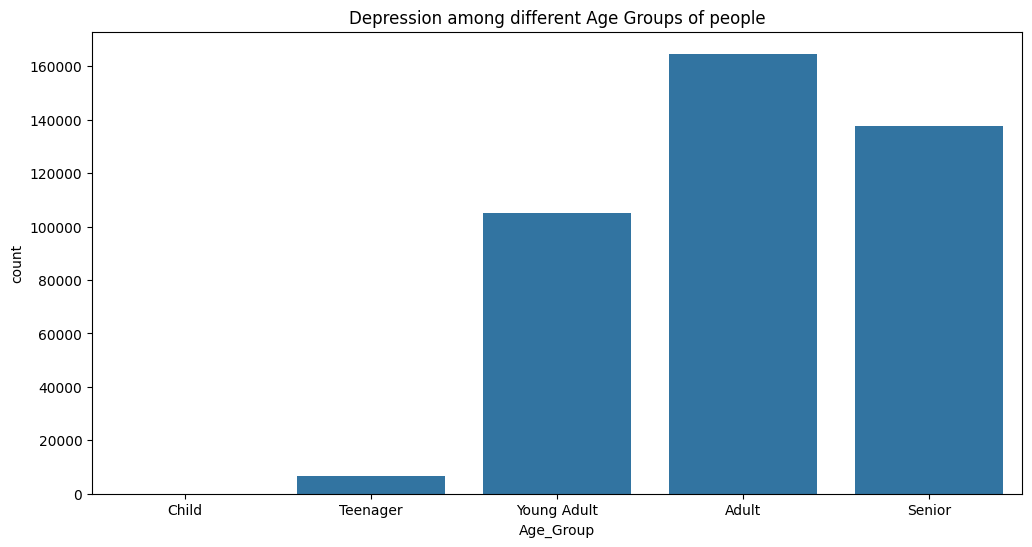

In [ ]:
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
Classification_df['Age_Group'] = pd.cut(Classification_df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', data=Classification_df)
plt.title('Depression among different Age Groups of people')
plt.show()

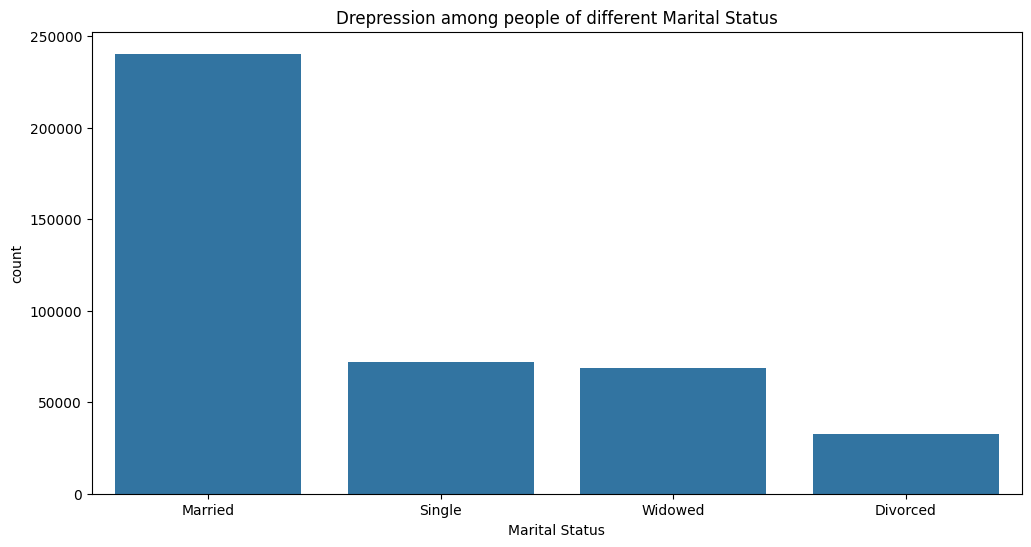

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital Status', data=Classification_df, order=Classification_df['Marital Status'].value_counts().index)
plt.title('Drepression among people of different Marital Status')
plt.show()

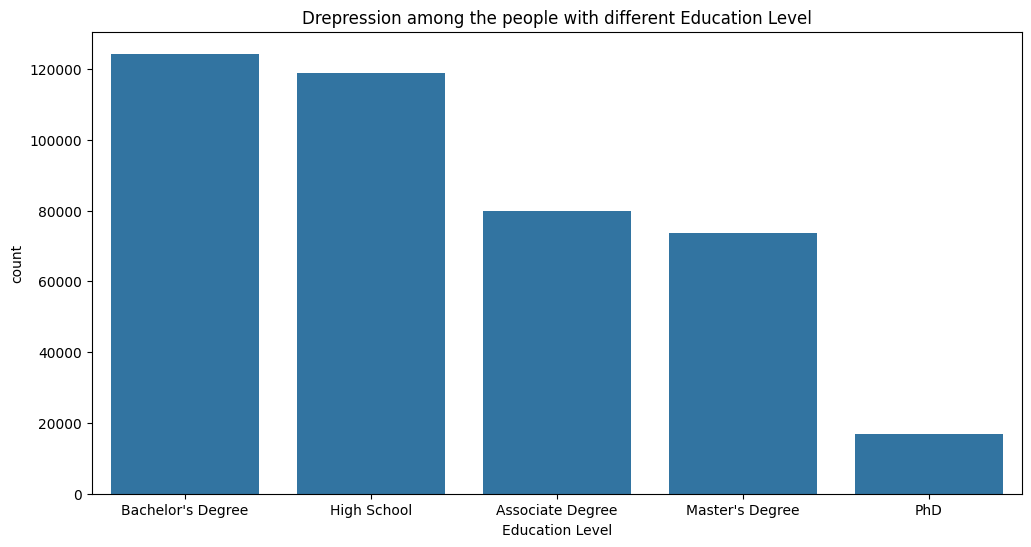

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education Level', data=Classification_df, order=Classification_df['Education Level'].value_counts().index)
plt.title('Drepression among the people with different Education Level')
plt.show()

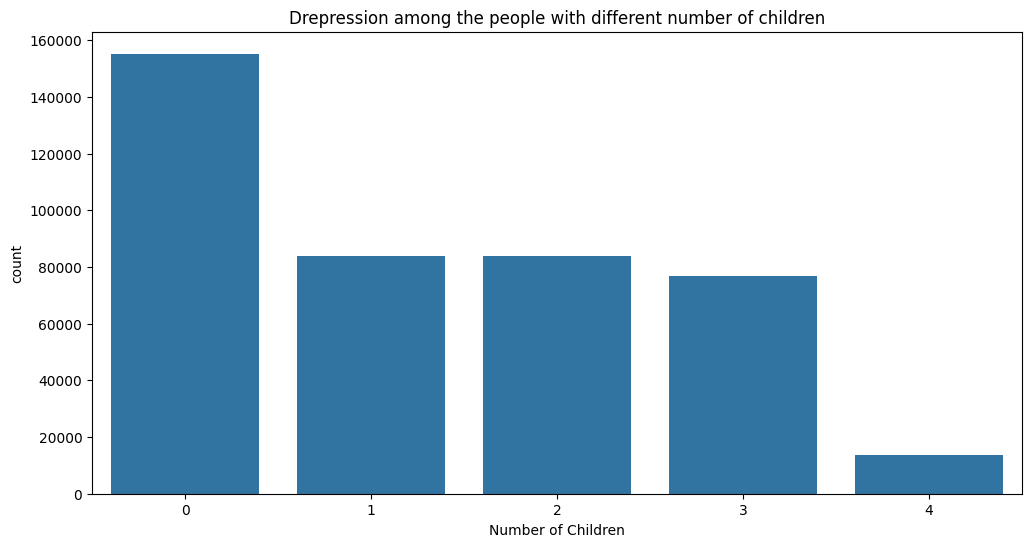

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Number of Children', data=Classification_df)
plt.title('Drepression among the people with different number of children')
plt.show()

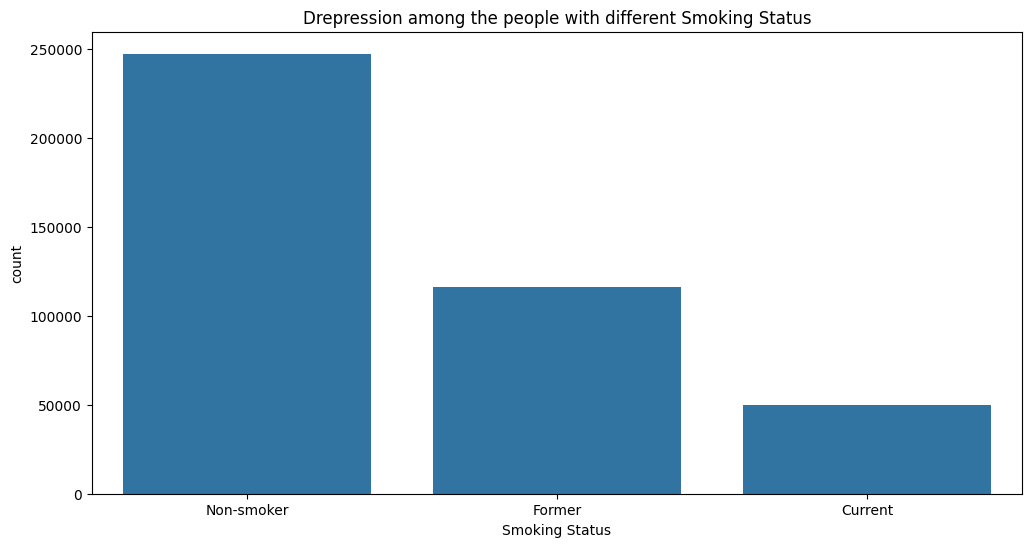

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Smoking Status', data=Classification_df, order=Classification_df['Smoking Status'].value_counts().index)
plt.title('Drepression among the people with different Smoking Status')
plt.show()

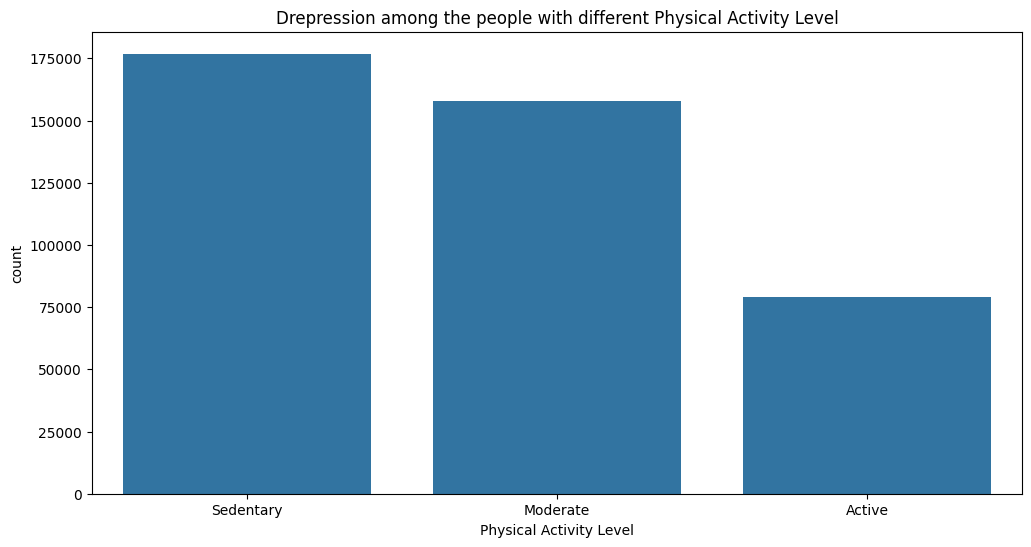

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Physical Activity Level', data=Classification_df, order=Classification_df['Physical Activity Level'].value_counts().index)
plt.title('Drepression among the people with different Physical Activity Level')
plt.show()

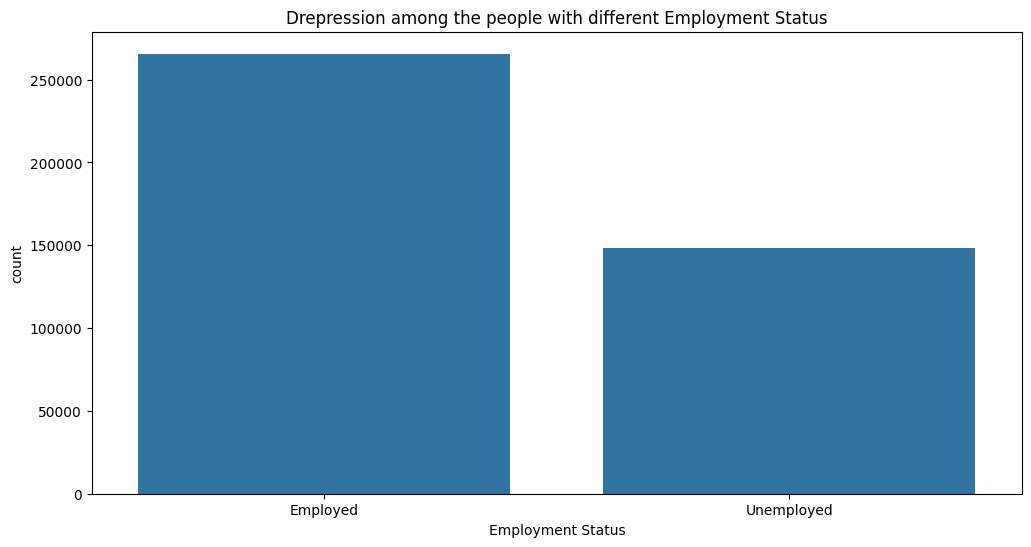

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Employment Status', data=Classification_df, order=Classification_df['Employment Status'].value_counts().index)
plt.title('Drepression among the people with different Employment Status')
plt.show()

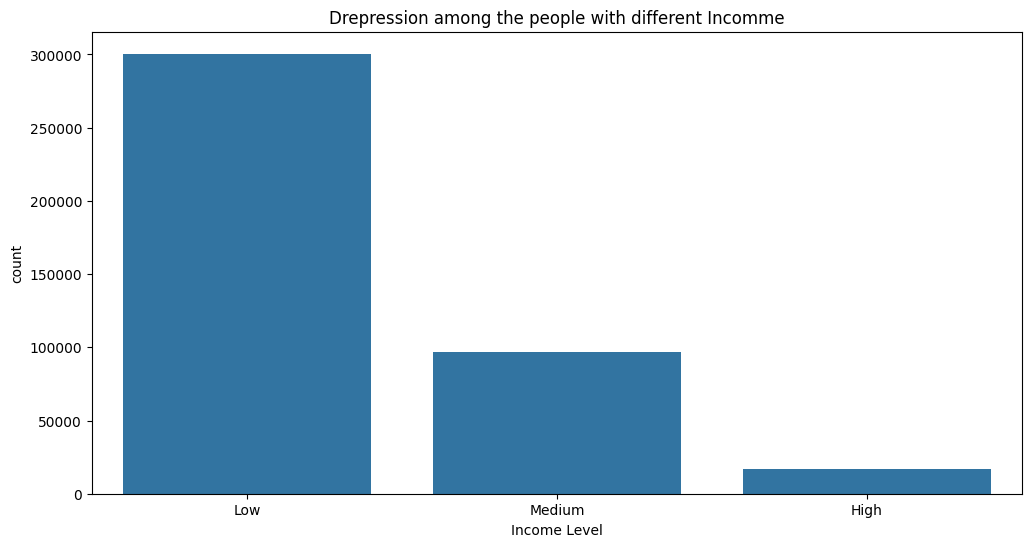

In [ ]:
bin_edges = np.linspace(Classification_df['Income'].min(), Classification_df['Income'].max(), num=4)  # 3 bins
Classification_df['Income Level'] = pd.cut(Classification_df['Income'], bins=bin_edges, labels=["Low", "Medium", "High"])
plt.figure(figsize=(12, 6))
sns.countplot(x='Income Level', data=Classification_df, order=Classification_df['Income Level'].value_counts().index)
plt.title('Drepression among the people with different Incomme')
plt.show()


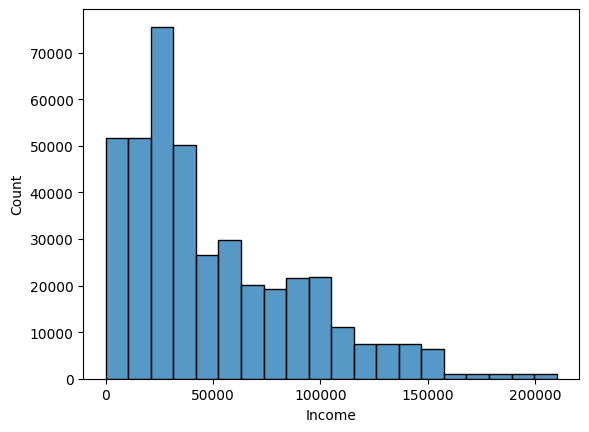

In [ ]:
sns.histplot(data=Classification_df, x='Income', bins=20)
plt.show()

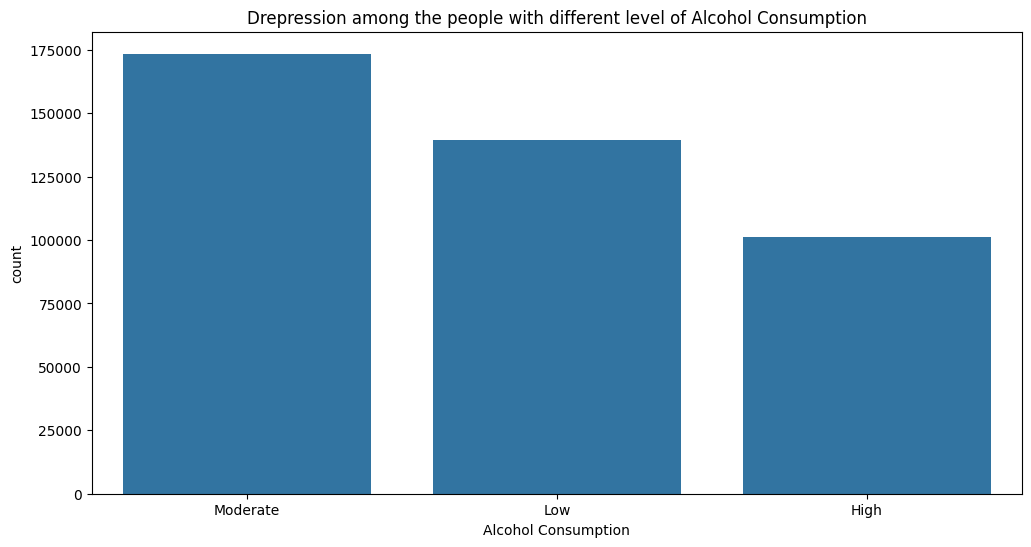

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Alcohol Consumption', data=Classification_df, order=Classification_df['Alcohol Consumption'].value_counts().index)
plt.title('Drepression among the people with different level of Alcohol Consumption')
plt.show()

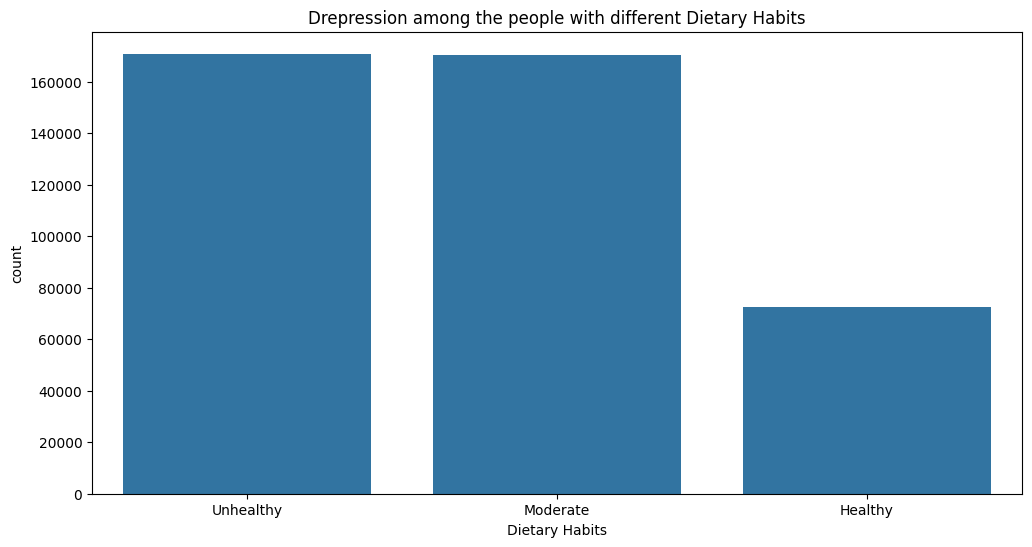

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Dietary Habits', data=Classification_df, order=Classification_df['Dietary Habits'].value_counts().index)
plt.title('Drepression among the people with different Dietary Habits')
plt.show()


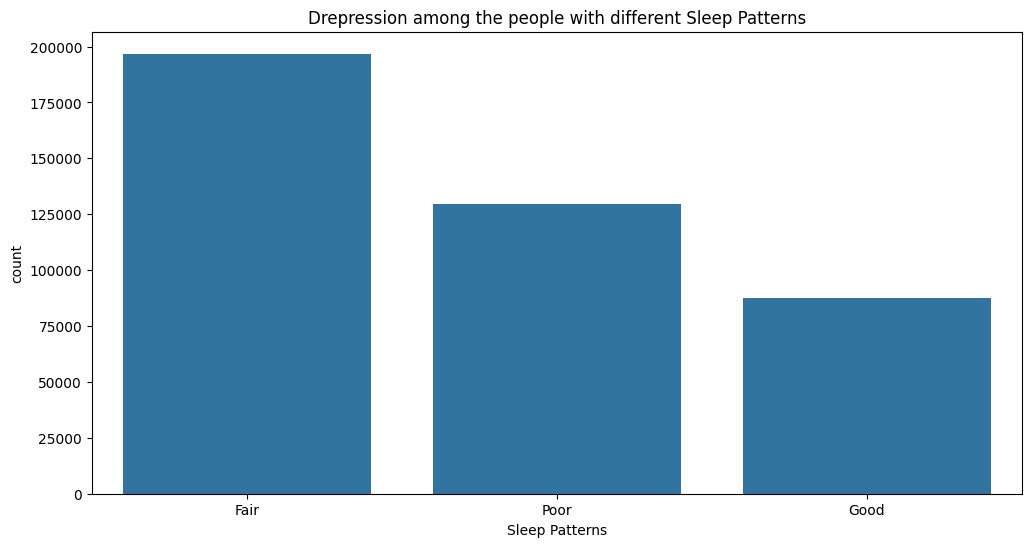

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sleep Patterns', data=Classification_df, order=Classification_df['Sleep Patterns'].value_counts().index)
plt.title('Drepression among the people with different Sleep Patterns')
plt.show()

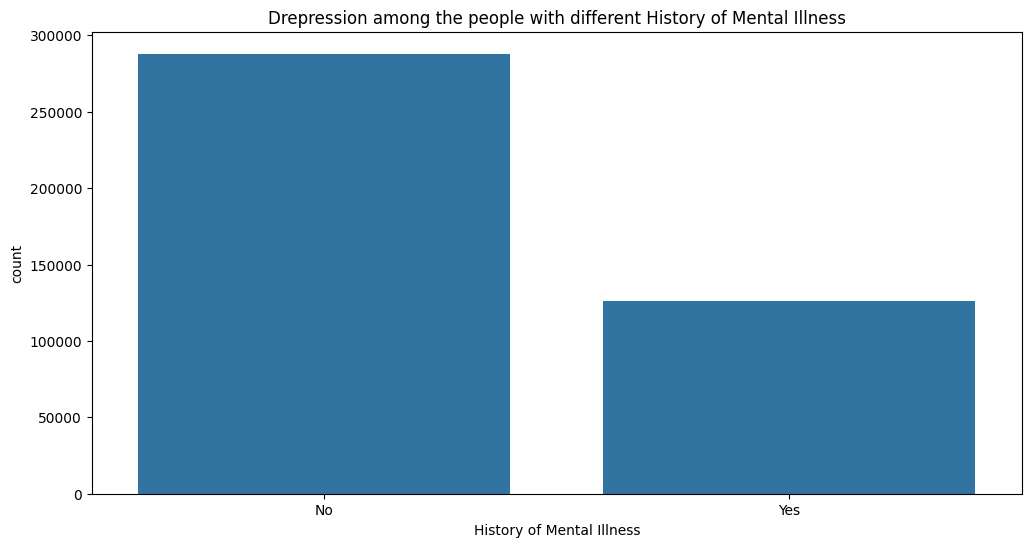

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='History of Mental Illness', data=Classification_df, order=Classification_df['History of Mental Illness'].value_counts().index)
plt.title('Drepression among the people with different History of Mental Illness')
plt.show()

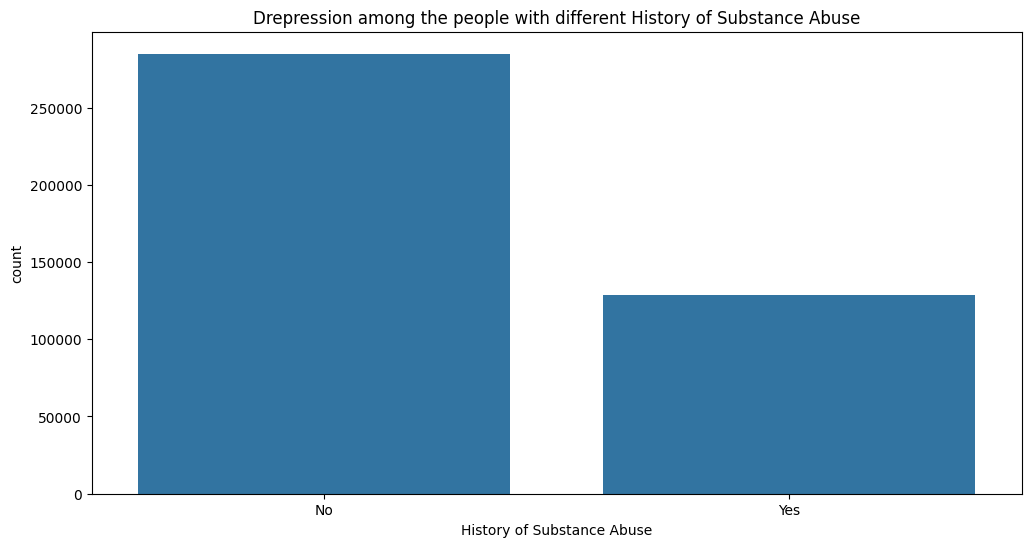

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='History of Substance Abuse', data=Classification_df, order=Classification_df['History of Substance Abuse'].value_counts().index)
plt.title('Drepression among the people with different History of Substance Abuse')
plt.show()

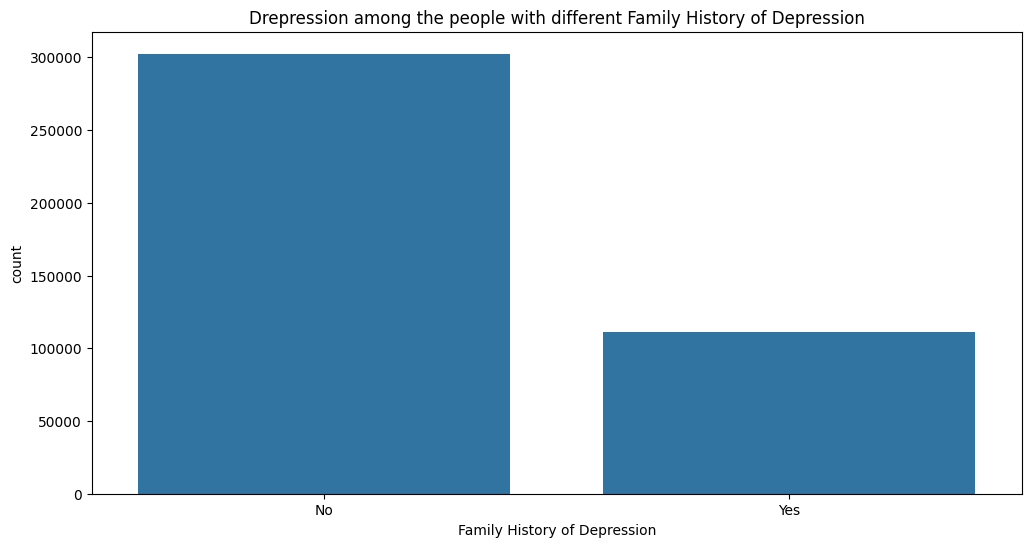

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Family History of Depression', data=Classification_df, order=Classification_df['Family History of Depression'].value_counts().index)
plt.title('Drepression among the people with different Family History of Depression')
plt.show()

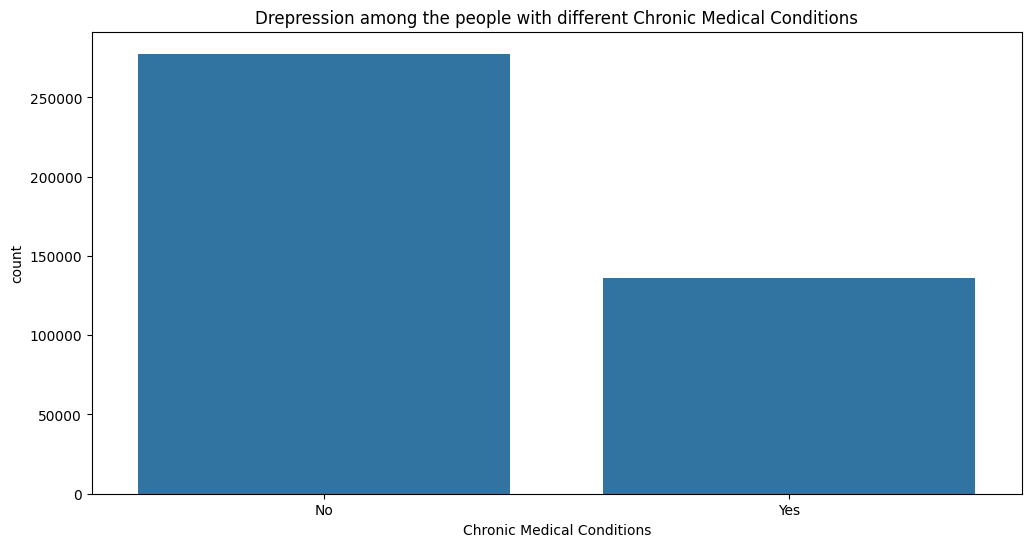

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Chronic Medical Conditions', data=Classification_df, order=Classification_df['Chronic Medical Conditions'].value_counts().index)
plt.title('Drepression among the people with different Chronic Medical Conditions')
plt.show()

In [ ]:
Classification_df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Group,Income Level
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Young Adult,Low
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,Adult,Low
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,Senior,Medium
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,Adult,Low
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,Teenager,Low


In [ ]:
Classification_df.drop(['Name','Age_Group','Income Level'], axis=1, inplace=True)
Classification_df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [ ]:
binary_columns = ['History of Mental Illness', 'History of Substance Abuse','Family History of Depression', 'Chronic Medical Conditions']
le = LabelEncoder()
for col in binary_columns:
    Classification_df[col] = le.fit_transform(Classification_df[col])

Classification_df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,1,0,1,1
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,1,0,0,1
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,0,0,1,0
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,0,0,0,0
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,1,0,1,1


In [ ]:
Classification_df = pd.get_dummies(Classification_df, columns=['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level',
                                 'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns'], drop_first=True).astype(int)
Classification_df.head()

,Age,Number of Children,Income,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,...,Smoking Status_Non-smoker,Physical Activity Level_Moderate,Physical Activity Level_Sedentary,Employment Status_Unemployed,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Good,Sleep Patterns_Poor
0,31,2,26265,1,0,1,1,1,0,0,...,1,0,0,1,0,1,1,0,0,0
1,55,1,42710,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,78,1,125332,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
3,58,3,9992,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1
4,18,0,8595,1,0,1,1,0,1,0,...,1,0,1,1,1,0,1,0,0,0


In [ ]:
scaler = StandardScaler()
Classification_df[['Age', 'Number of Children', 'Income']] = scaler.fit_transform(Classification_df[['Age', 'Number of Children', 'Income']])
Classification_df.head()
Classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                413768 non-null  float64
 1   Number of Children                 413768 non-null  float64
 2   Income                             413768 non-null  float64
 3   History of Mental Illness          413768 non-null  int64  
 4   History of Substance Abuse         413768 non-null  int64  
 5   Family History of Depression       413768 non-null  int64  
 6   Chronic Medical Conditions         413768 non-null  int64  
 7   Marital Status_Married             413768 non-null  int64  
 8   Marital Status_Single              413768 non-null  int64  
 9   Marital Status_Widowed             413768 non-null  int64  
 10  Education Level_Bachelor's Degree  413768 non-null  int64  
 11  Education Level_High School        4137

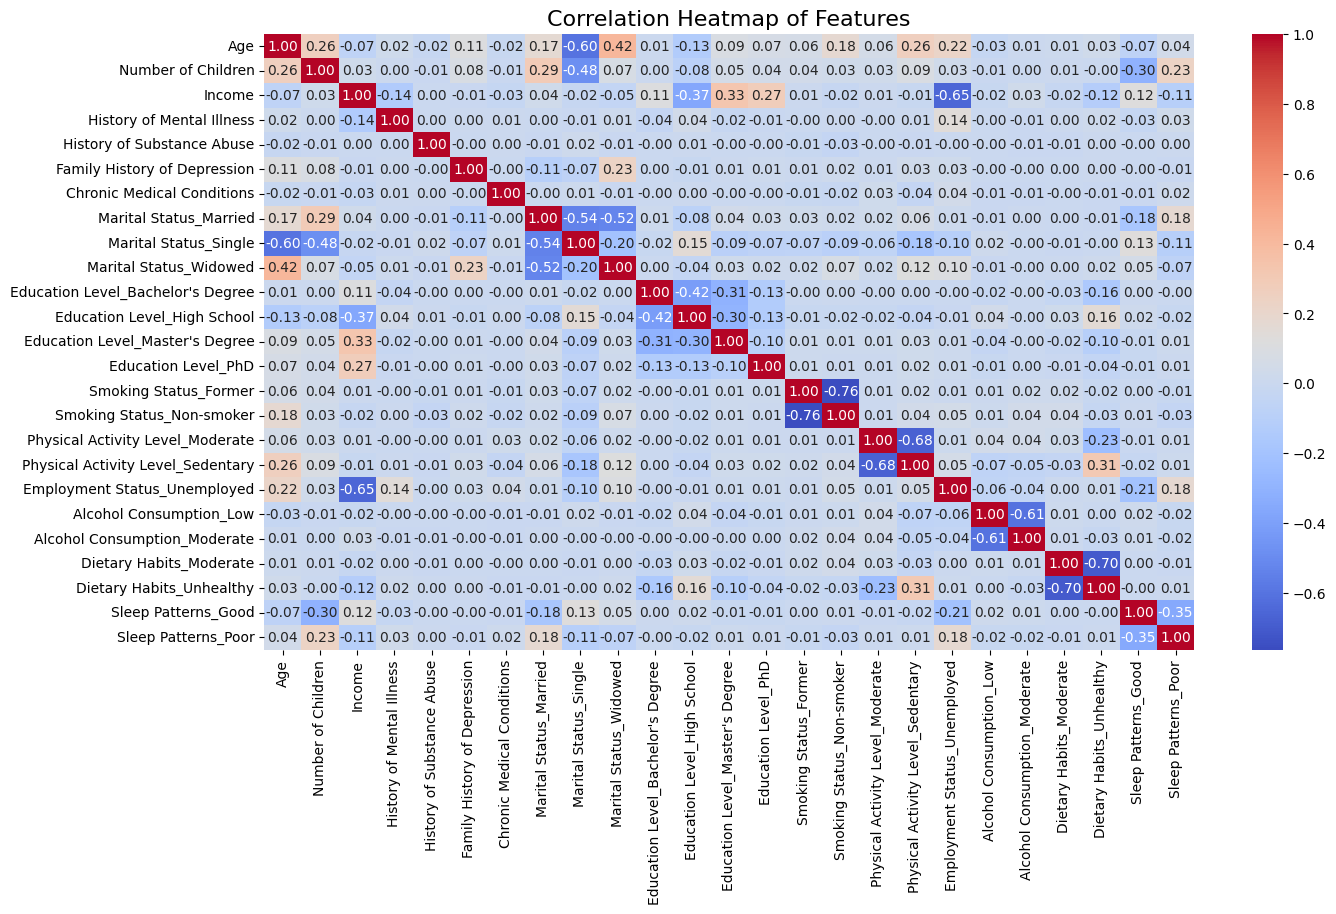

In [ ]:
# Compute the correlation matrix
correlation_matrix = Classification_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

In [ ]:
X = Classification_df.drop('Chronic Medical Conditions', axis=1)
y = Classification_df['Chronic Medical Conditions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss with weights
def compute_loss(y, y_pred, class_weights):
    m = len(y)
    loss = -(1/m) * np.sum(class_weights[y] * (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    return loss

# Gradient descent
def gradient_descent(X, y, weights, class_weights, learning_rate, iterations):
    m = X.shape[0]
    for i in range(iterations):
        # Predictions
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Compute gradients
        gradient = (1/m) * np.dot(X.T, (y_pred - y))

        # Update weights
        weights -= learning_rate * gradient

        # Monitor loss
        if i % 100 == 0:
            loss = compute_loss(y, y_pred, class_weights)
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return weights

# Train logistic regression from scratch
def train_logistic_regression(X, y, class_weights, learning_rate=0.01, iterations=1000):
    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Perform gradient descent
    weights = gradient_descent(X, y, weights, class_weights, learning_rate, iterations)

    return weights

# Prediction function
def predict(X, weights, threshold=0.5):
    z = np.dot(X, weights)
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)

# Prepare data
X_train_np = X_train.to_numpy()  # Convert DataFrame to numpy array
y_train_np = y_train.to_numpy()

# Calculate class weights
class_counts = np.bincount(y_train_np)  # Count samples per class
total_samples = len(y_train_np)
class_weights = total_samples / (len(class_counts) * class_counts)

# Train the model
weights = train_logistic_regression(X_train_np, y_train_np, class_weights, learning_rate=0.01, iterations=1000)

# Make predictions
y_pred = predict(X_test.to_numpy(), weights)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.7054
Iteration 200, Loss: 0.7219
Iteration 300, Loss: 0.7336
Iteration 400, Loss: 0.7407
Iteration 500, Loss: 0.7449
Iteration 600, Loss: 0.7473
Iteration 700, Loss: 0.7487
Iteration 800, Loss: 0.7495
Iteration 900, Loss: 0.7499
Accuracy: 0.6707591173840539
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     55508
           1       0.00      0.00      0.00     27246

    accuracy                           0.67     82754
   macro avg       0.34      0.50      0.40     82754
weighted avg       0.45      0.67      0.54     82754



In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=0))

Accuracy: 0.5759963264615607
              precision    recall  f1-score   support

           0       0.70      0.65      0.67     55508
           1       0.38      0.43      0.40     27246

    accuracy                           0.58     82754
   macro avg       0.54      0.54      0.54     82754
weighted avg       0.59      0.58      0.58     82754



In [ ]:
model2 = DecisionTreeClassifier(class_weight='balanced')
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.5607463083355487
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     55508
           1       0.33      0.34      0.33     27246

    accuracy                           0.56     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.56      0.56      0.56     82754



In [ ]:
# Hyperparameter Optimization for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best score: 0.6708266115603667


In [ ]:
# Hyperparameter Optimization for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure of impurity
    'max_depth': [None, 5, 10, 15, 20],  # Depth of the tree to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider for splitting
}

# Set up GridSearchCV with cross-validation (cv=5)
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)
# Print the best hyperparameters
print("Best parameters:", grid_search_dt.best_params_)
# Print the best score (cross-validation score of the best parameters)
print("Best cross-validation score:", grid_search_dt.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.6708386956505297


In [ ]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Smoking Status_Former', 'Smoking Status_Non-smoker',
       'Physical Activity Level_Moderate', 'Physical Activity Level_Sedentary',
       'Employment Status_Unemployed', 'Alcohol Consumption_Low',
       'Alcohol Consumption_Moderate'],
      dtype='object')


In [ ]:
X = Classification_df[['Smoking Status_Former', 'Smoking Status_Non-smoker','Physical Activity Level_Moderate', 'Physical Activity Level_Sedentary',
                       'Employment Status_Unemployed', 'Alcohol Consumption_Low','Alcohol Consumption_Moderate']]
y = Classification_df['Chronic Medical Conditions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=0))

Accuracy: 0.5662687000024168
              precision    recall  f1-score   support

           0       0.70      0.62      0.66     55508
           1       0.37      0.45      0.41     27246

    accuracy                           0.57     82754
   macro avg       0.53      0.54      0.53     82754
weighted avg       0.59      0.57      0.58     82754



**Regression**

In [ ]:
Regression_df = pd.read_csv('/content/drive/MyDrive/Portfolio Datasets/Solar Radiation and Meteorological Dataset 2019.csv')
Regression_df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
0,2019,1,1,0,0,4.8,0,0,0,3.0,0,0,0,87.89,152.90,0.12,993,5.4,NaN
1,2019,1,1,0,15,4.8,0,0,0,3.0,0,0,0,87.89,150.20,0.12,993,5.5,NaN
2,2019,1,1,0,30,4.8,0,0,0,2.9,0,0,0,87.80,147.41,0.12,992,5.6,NaN
3,2019,1,1,0,45,4.8,0,0,0,3.3,0,0,0,90.23,144.57,0.12,992,5.8,NaN
4,2019,1,1,1,0,4.8,0,0,0,3.3,0,0,0,90.23,141.69,0.12,992,5.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019,12,31,22,45,4.0,0,0,0,4.0,0,0,0,100.00,163.63,0.12,999,2.0,NaN
35036,2019,12,31,23,0,3.9,0,0,0,3.9,0,0,0,100.00,162.09,0.12,999,2.0,NaN
35037,2019,12,31,23,15,3.9,0,0,0,3.9,0,0,0,100.00,160.16,0.12,999,2.0,NaN
35038,2019,12,31,23,30,3.9,0,0,0,3.9,0,0,0,100.00,157.93,0.12,999,2.0,NaN


This dataset is scourced from Kaggle where it is uploaded by İbrahim Doruk Kızıloklu and one other collaborator. This data set is created for research and improvement of PV panels .Meteorological factors are highly important in Solar Radiation. It is a serially complete collection of hourly and half-hourly values of the three most common measurements of solar radiation – global horizontal, direct normal, and diffuse horizontal irradiance — and meteorological data. This dataset aligns with the UNSDG 13 climate action as this data can used to predict temperature depending on the various solar radiation data and metorological data and can be used to predict changes based on time and pressure.

In [ ]:
Regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                35040 non-null  int64  
 1   Month               35040 non-null  int64  
 2   Day                 35040 non-null  int64  
 3   Hour                35040 non-null  int64  
 4   Minute              35040 non-null  int64  
 5   Temperature         35040 non-null  float64
 6   Clearsky DHI        35040 non-null  int64  
 7   Clearsky DNI        35040 non-null  int64  
 8   Clearsky GHI        35040 non-null  int64  
 9   Dew Point           35040 non-null  float64
 10  DHI                 35040 non-null  int64  
 11  DNI                 35040 non-null  int64  
 12  GHI                 35040 non-null  int64  
 13  Relative Humidity   35040 non-null  float64
 14  Solar Zenith Angle  35040 non-null  float64
 15  Surface Albedo      35040 non-null  float64
 16  Pres

In [ ]:
Regression_df.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
count,35040.0,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,0.0
mean,2019.0,6.526027,15.720548,11.500000,22.500000,18.045830,56.894092,306.802026,236.789355,10.929415,59.562357,228.802997,198.772574,67.861059,89.671970,0.138274,992.589954,2.811527,NaN
std,0.0,3.447901,8.796373,6.922285,16.770749,8.268246,70.870589,353.023040,311.637340,4.601015,86.356682,332.053129,293.202433,20.949462,37.114371,0.012801,5.108387,1.520357,NaN
min,2019.0,1.000000,1.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,-4.700000,0.000000,0.000000,0.000000,9.530000,14.620000,0.120000,971.000000,0.100000,NaN
25%,2019.0,4.000000,8.000000,5.750000,11.250000,11.700000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,52.827500,60.350000,0.130000,989.000000,1.600000,NaN
50%,2019.0,7.000000,16.000000,11.500000,22.500000,17.500000,0.000000,0.000000,0.000000,11.300000,0.000000,0.000000,0.000000,71.160000,89.300000,0.140000,992.000000,2.500000,NaN
75%,2019.0,10.000000,23.000000,17.250000,33.750000,24.000000,109.000000,683.000000,470.000000,14.400000,107.000000,512.000000,359.000000,85.692500,119.130000,0.150000,996.000000,3.700000,NaN
max,2019.0,12.000000,31.000000,23.000000,45.000000,40.200000,529.000000,1005.000000,1030.000000,21.200000,529.000000,1005.000000,1030.000000,100.000000,165.340000,0.160000,1010.000000,9.400000,NaN


In [ ]:
# Check for missing values
Regression_df.isnull().sum()

,0
Year,0
Month,0
Day,0
Hour,0
Minute,0
Temperature,0
Clearsky DHI,0
Clearsky DNI,0
Clearsky GHI,0
Dew Point,0


In [ ]:
# Check for duplicate rows
Regression_df.duplicated().sum()

0

In [ ]:
Regression_df.drop(columns=['Unnamed: 18'], inplace=True)
Regression_df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed
0,2019,1,1,0,0,4.8,0,0,0,3.0,0,0,0,87.89,152.90,0.12,993,5.4
1,2019,1,1,0,15,4.8,0,0,0,3.0,0,0,0,87.89,150.20,0.12,993,5.5
2,2019,1,1,0,30,4.8,0,0,0,2.9,0,0,0,87.80,147.41,0.12,992,5.6
3,2019,1,1,0,45,4.8,0,0,0,3.3,0,0,0,90.23,144.57,0.12,992,5.8
4,2019,1,1,1,0,4.8,0,0,0,3.3,0,0,0,90.23,141.69,0.12,992,5.9


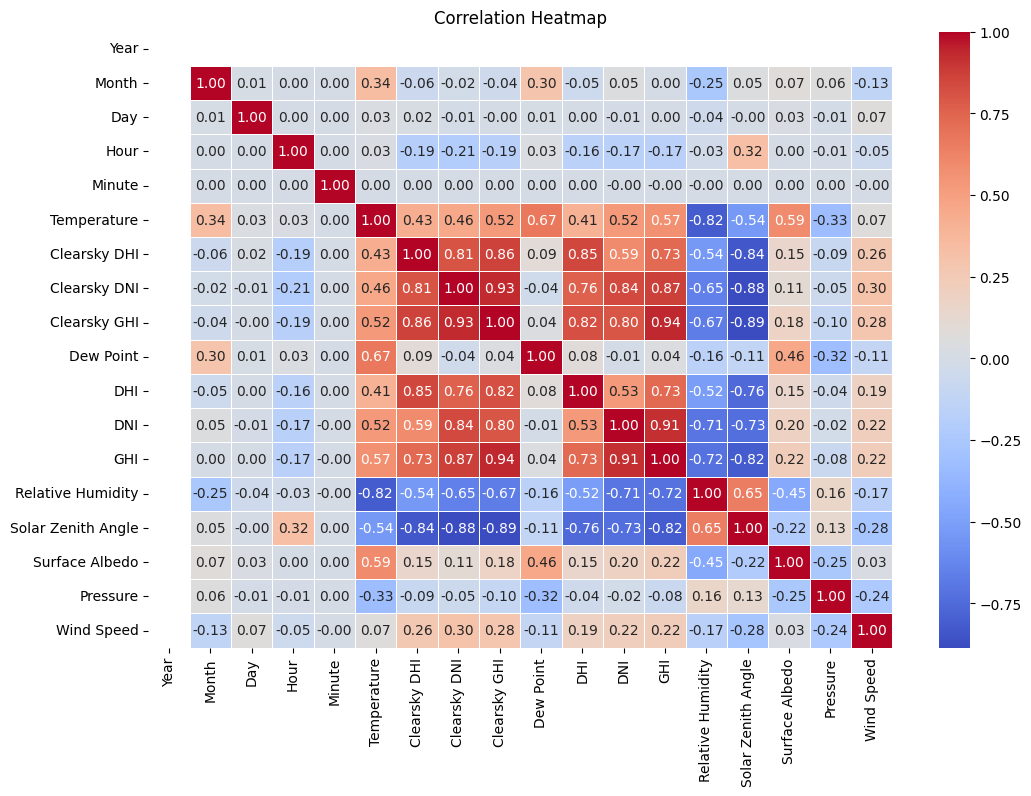

In [ ]:
corr_matrix = Regression_df.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Regression_df.drop(columns=['Year','Minute','Hour','Day','Wind Speed'], inplace=True)
Regression_df.head()

,Month,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure
0,1,4.8,0,0,0,3.0,0,0,0,87.89,152.90,0.12,993
1,1,4.8,0,0,0,3.0,0,0,0,87.89,150.20,0.12,993
2,1,4.8,0,0,0,2.9,0,0,0,87.80,147.41,0.12,992
3,1,4.8,0,0,0,3.3,0,0,0,90.23,144.57,0.12,992
4,1,4.8,0,0,0,3.3,0,0,0,90.23,141.69,0.12,992


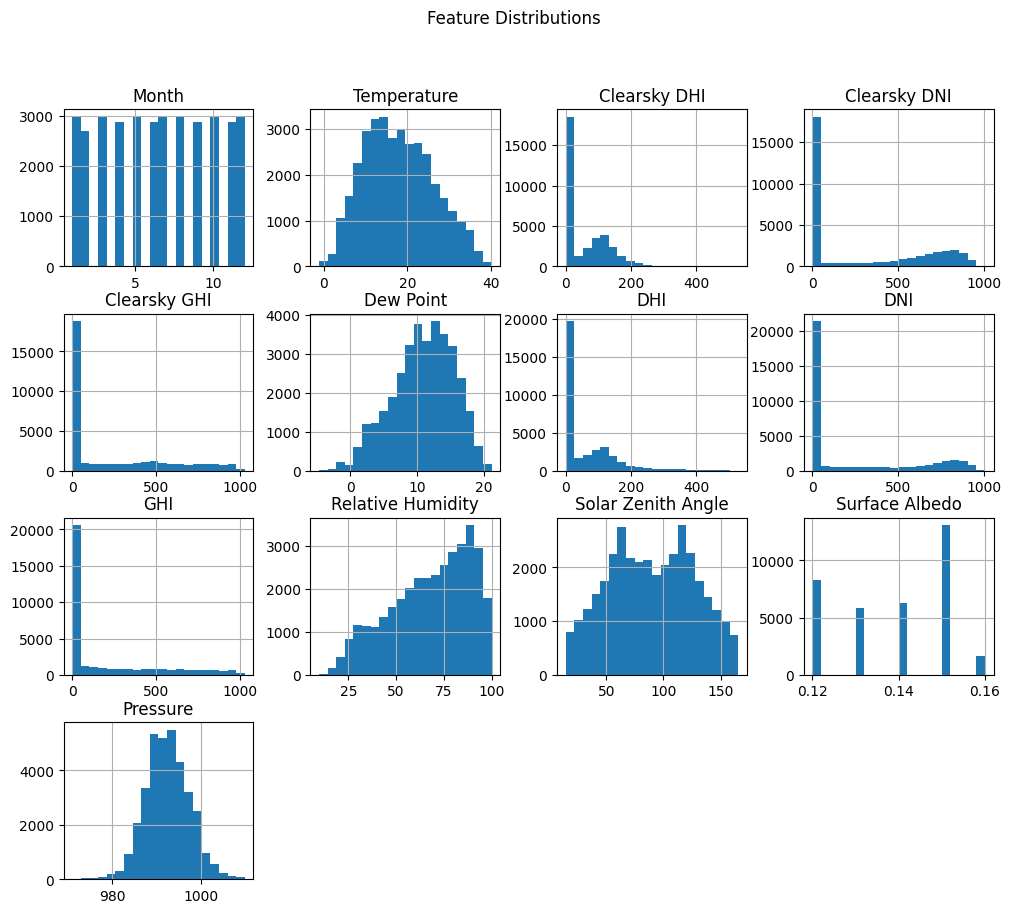

In [ ]:
#Before handling outliers
Regression_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

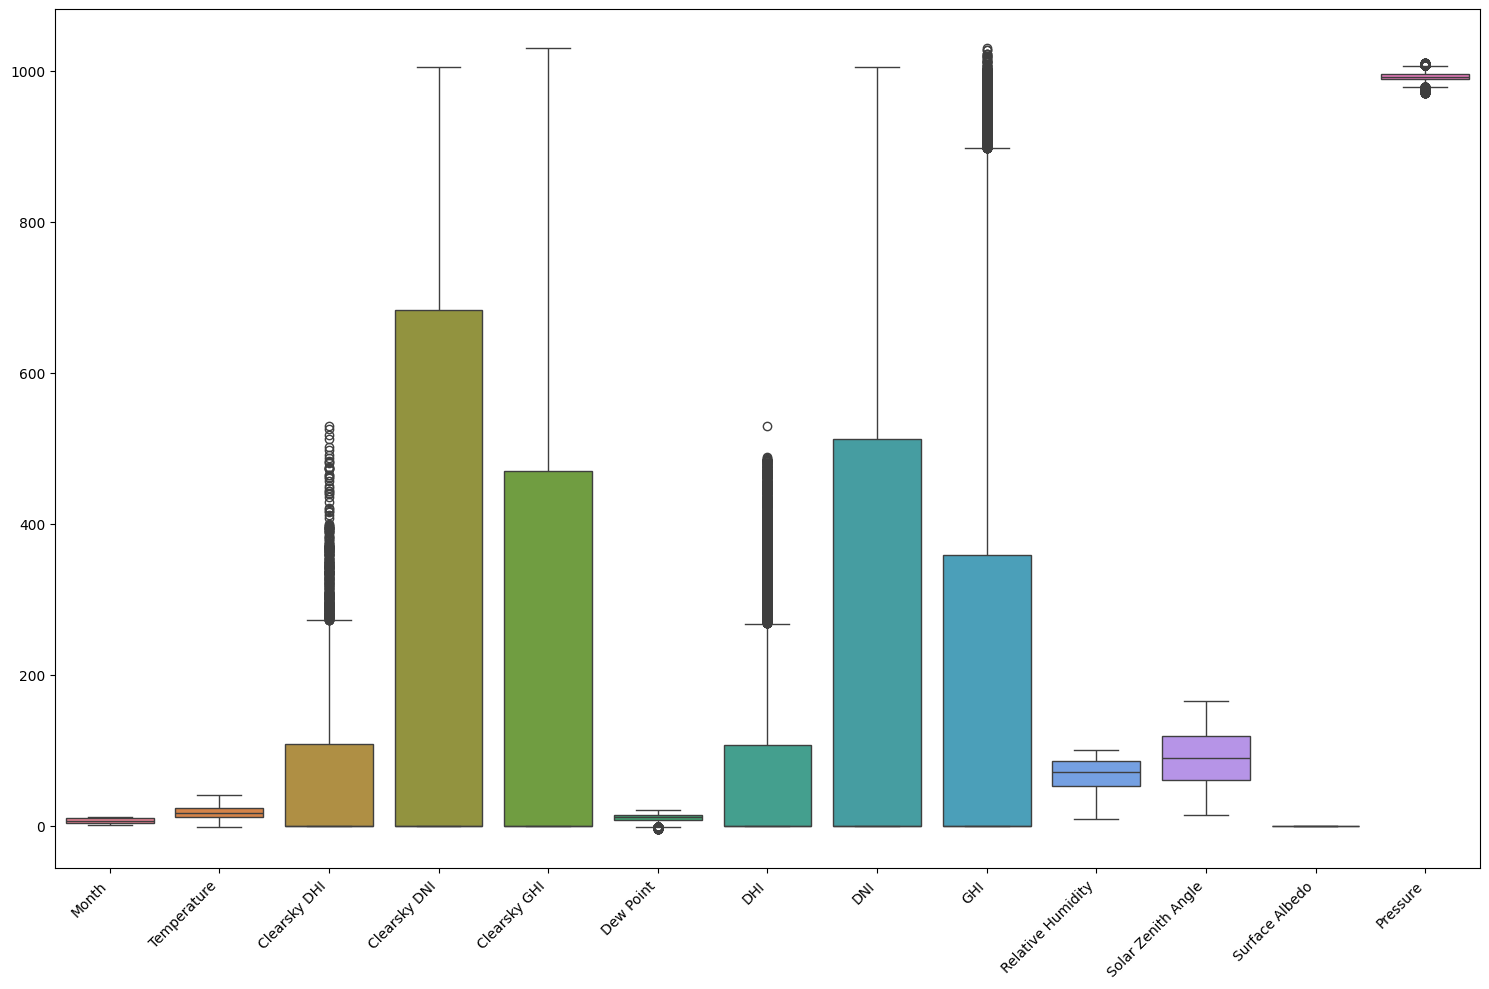

In [ ]:
#Before handling outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=Regression_df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Identify outliers using the IQR method for numerical features
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)  # Clip values outside the bounds
    return df


# List of numerical features to handle
numerical_cols = ['Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point',
                  'DHI', 'DNI', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
                  'Surface Albedo', 'Pressure']

# Iterate through numerical features and handle outliers
for col in numerical_cols:
    Regression_df = handle_outliers(Regression_df, col)

# The outliers in the specified numerical columns of the 'Regression_df' dataframe are now handled by clipping.
# Values exceeding the upper or lower bounds defined by IQR are set to these bounds respectively.
# No changes are made to other columns or rows.


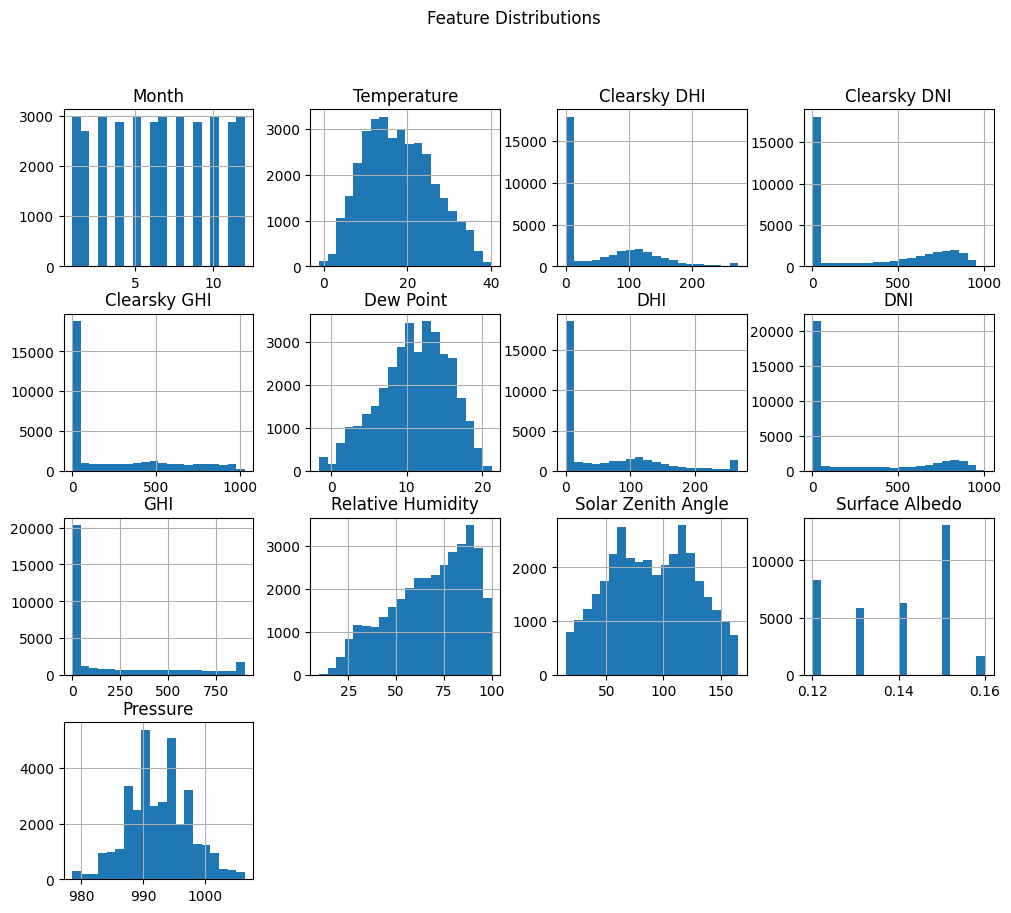

In [ ]:
#After handling outliers
Regression_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

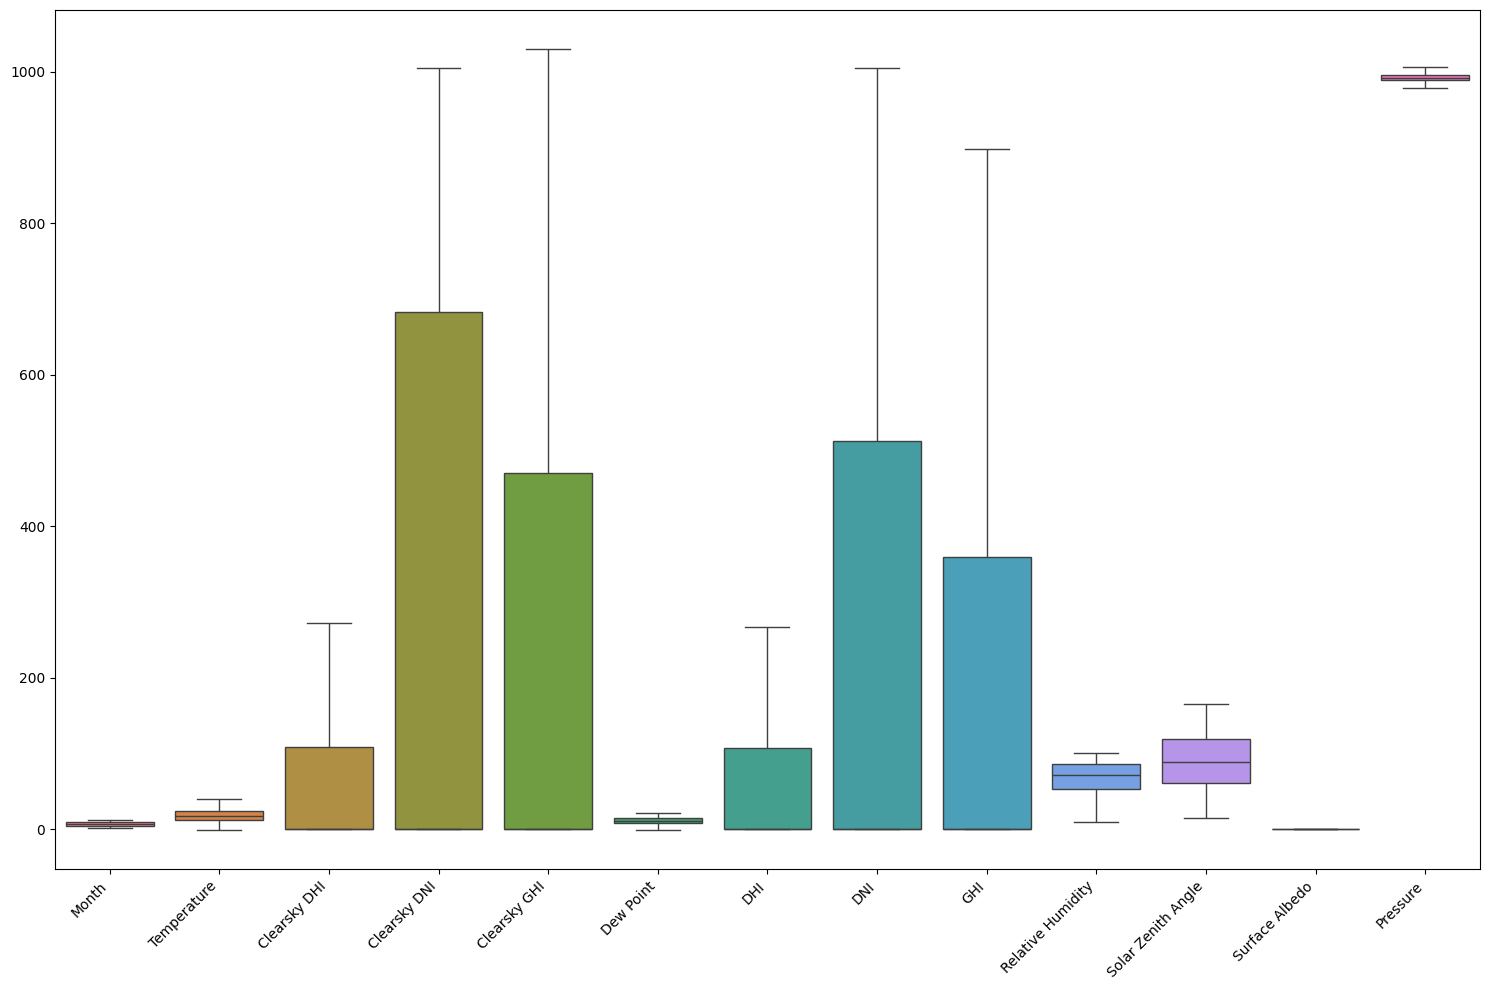

In [ ]:
#After handling outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=Regression_df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Define the Linear Regression class
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept
        X = np.c_[np.ones(X.shape[0]), X]

        # Calculate the coefficients using the normal equation
        X_transpose = X.T
        self.coef_ = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
        return self

    def predict(self, X):
        return self.intercept_ + X @ self.coef_

# Prepare the data
X = Regression_df[['Month', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'DHI', 'DNI', 'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure']].values
y = Regression_df['Temperature'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.4f}")
print(f"Training R^2: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R^2: {r2_test:.4f}")


Training MSE: 1.6047
Training R^2: 0.9766
Test MSE: 1.5420
Test R^2: 0.9772


In [ ]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Results:")
print(f"MSE: {lr_mse}")
print(f"R-squared: {lr_r2}")


Linear Regression Results:
MSE: 1.542010118258863
R-squared: 0.977209193991171


In [ ]:
# Model 2: Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"\nRandom Forest Regression Results:")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regression Results:
MSE: 0.009760452197488586
R-squared: 0.9998557411718916


In [ ]:
# Define the parameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],  # Try both with and without intercept
    'positive': [True, False]        # Whether to constrain coefficients to be positive
}

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    n_jobs=-1,  # Use all available CPU cores for parallelism
    verbose=1   # Print progress messages
)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best parameters and best score from GridSearchCV
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best Hyperparameters for Linear Regression: {best_params_lr}")
print(f"Best Cross-Validation MSE: {best_score_lr}")

# Get the best model from GridSearchCV
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
lr_predictions = best_lr_model.predict(X_test)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"\nLinear Regression Results (Best Model):")
print(f"MSE: {lr_mse}")
print(f"R-squared: {lr_r2}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Best Cross-Validation MSE: -1.6072123935283176

Linear Regression Results (Best Model):
MSE: 1.5420101182546357
R-squared: 0.9772091939912335


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define a reduced parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],            # Reduce the range of estimators
    'max_depth': [10, 20, None],              # Smaller range for max_depth
    'min_samples_split': [2, 5],              # Only critical splits
    'min_samples_leaf': [1, 2],               # Smaller range for leaf size
    'max_features': ['sqrt', 'log2']          # Omit 'auto' for fewer combinations
}

# Use RandomizedSearchCV for faster hyperparameter tuning
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=20,  # Number of parameter settings sampled (fewer iterations for speed)
    cv=3,       # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Parallelize across all CPUs
    verbose=1,
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Best parameters and best score from RandomizedSearchCV
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print(f"Best Hyperparameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation MSE: {best_score_rf}")

# Get the best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best model on the test set
rf_predictions = best_rf_model.predict(X_test)

# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"\nRandom Forest Regression Results (Best Model):")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Cross-Validation MSE: -0.19243264068385435

Random Forest Regression Results (Best Model):
MSE: 0.13547210689814804
R-squared: 0.9979977313563875


In [ ]:
X_selected = Regression_df[['Month', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'DHI', 'DNI', 'GHI','Surface Albedo']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Print the results
print(f"Linear Regression Results:")
print(f"MSE: {lr_mse}")
print(f"R-squared: {lr_r2}")


Linear Regression Results:
MSE: 11.803263625922618
R-squared: 0.8255485561448758
